# 공분산과 상관계수

## 표본공분산(Sample covariance)

$${s_{xy}}=\frac{1}{N}\Sigma({x_i}-\hat{x})({y_i}-\hat{y})$$

## 표본상관계수(Sample correlation coefficient)

- 공분산에 각각의 표준편차 값으로 나눈 값
- 각각의 표준편차를 나눠주는 이유
      자료 분포의 방향성만 분리해서 보기 위함
      표준화를 하기 위함
$${s_{xy}}=\frac{1}{N}\Sigma({x_i}-\hat{x})({y_i}-\hat{y})$$

$$-1 <= {r_{xy}} <= 1$$

In [9]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
!pip install koreanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [39]:
from sklearn.datasets import load_iris
from matplotlib.collections import PolyCollection
from matplotlib import colors as mcolors
from matplotlib.ticker import NullFormatter
from matplotlib import transforms
from matplotlib.colorbar import constrained_layout
from scipy.integrate import simps
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import koreanize_matplotlib
import string
import scipy as sp
import random
import statsmodels.api as sm

In [40]:
X = load_iris()

In [20]:
load_iris().keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [21]:
load_iris().feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [22]:
# X.data는 iris의 데이터 밸류값이 정리되어 있다.
# X.feature_names에는 각각의 column 이름이 정의되어 있다.
# X.feature의 순서에 따라서 해당되는 데이터를 가져온다.
sepal_length = X.data[:,0]
sepal_width = X.data[:,1]
petal_length = X.data[:,2]
petal_width = X.data[:,3]
sp.stats.pearsonr(sepal_length, petal_length)[0]

0.8717537758865831

In [23]:
# 슬라이싱 방법법
np_array = np.random.rand(5,7)
print(np_array)
np_array[:,0]

[[0.34848584 0.75945915 0.97653748 0.81756582 0.64131165 0.16823909
  0.38377649]
 [0.92928315 0.48115549 0.65306721 0.5392449  0.9664267  0.01771612
  0.57729204]
 [0.95509163 0.07475377 0.74889021 0.9836099  0.22000692 0.34361616
  0.14413412]
 [0.4672587  0.53480278 0.33387762 0.89652303 0.24041371 0.72888752
  0.52951259]
 [0.84595641 0.7681397  0.80592171 0.01267454 0.52758677 0.14185476
  0.447319  ]]


array([0.34848584, 0.92928315, 0.95509163, 0.4672587 , 0.84595641])

# 상관계수 Scatter Plot
피어슨 상관계수의 경우 선형적인 관계만을 측정하기 때문에 선형적이지 않으면서 관계가 있는 데이터의 경우에 피어슨 상관계수는 0이다.

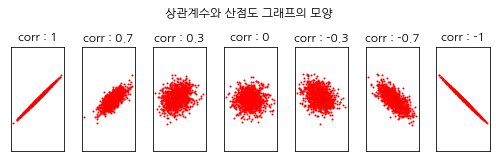

In [27]:
np.random.seed(0)
corrs = [1,0.7,0.3,0,-0.3,-0.7,-1]
plt.figure(figsize=(len(corrs),2))
for i,r in enumerate(corrs):
    x,y, = np.random.multivariate_normal([0,0],[[1,r],[r,1]],1000).T
    plt.subplot(1,len(corrs), i+1)
    plt.plot(x,y, 'ro',ms=1)
    plt.axis('equal')
    plt.xticks([])
    plt.yticks([])
    plt.title(f'corr : {r}')

plt.suptitle('상관계수와 산점도 그래프의 모양',y=1.1)
plt.tight_layout()
plt.show()

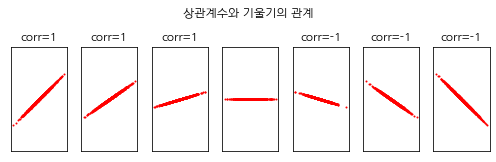

In [33]:
# 랜덤 요소 제거
np.random.seed(1)

# 기울기 설정
slops = [1,0.7,0.3,0,-0.3,-0.7,-1]

# 그래프 설정
plt.figure(figsize=(len(slops),2))

for i,s in enumerate(slops):
    # 서브플롯 배경 그리기
    plt.subplot(1,len(slops), i+1)

    # 다변수 정규분포
    x,y, = np.random.multivariate_normal([0,0],[[1,1],[1,1]],1000).T
    
    #기울기 변경
    y2 = s*y
    
    #데이터 플롯 그리기
    plt.plot(x,y2, 'ro',ms=1)
    plt.axis('equal')
    
    # 특정된 x나 y값을 표현하는건데 지금은 아무것도 표현하지 않도록 설정
    # 만약 아무것도 안 주면 자동으로 생성하기 때문에 []인자 전달
    plt.xticks([])
    plt.yticks([])
    if s>0:
        # 서브플롯의 제목
        plt.title('corr=1')
    elif s<0:
        plt.title('corr=-1')

# 플롯의 대제목
plt.suptitle('상관계수와 기울기의 관계',y=1.1)

# 축의 글자가 겹치지 않도록 layout 설정
plt.tight_layout()

# 그래프 보이기
plt.show()

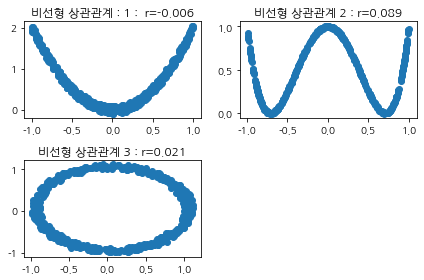

-0.005797705098316373 0.08943920076186704 0.0205361163221056


In [38]:
n=500
np.random.seed(2)

plt.subplot(221)
x1=np.random.uniform(-1,1,n)
y1=2*x1**2 + np.random.uniform(-0.1,0.1,n)
plt.scatter(x1,y1)
r1=sp.stats.pearsonr(x1,y1)[0]
plt.title(f'비선형 상관관계 : 1 :  r={r1.round(3)}')

plt.subplot(222)
x2=np.random.uniform(-1,1,n)
y2=4 * (x2**2-0.5)**2 + 0.1 * np.random.uniform(-0.1,0.1,n)
plt.scatter(x2,y2)
r2= sp.stats.pearsonr(x2,y2)[0]
plt.title(f'비선형 상관관계 2 : r={r2.round(3)}')

plt.subplot(223)
x3=np.random.uniform(-1,1,n)
y3=np.cos(x3 * np.pi) + np.random.uniform(0,1/8,n)
x3=np.sin(x3 * np.pi) + np.random.uniform(0,1/8,n)
plt.scatter(x3,y3)
r3= sp.stats.pearsonr(x3,y3)[0]
plt.title(f'비선형 상관관계 3 : r={r3.round(3)}')

plt.tight_layout()
plt.show()
print(r1,r2,r3)

# **데이터 분포에 따른 유의점**

In [41]:
data = sm.datasets.get_rdataset('anscombe')

In [44]:
df = data.data
df[['x1','y1','x2','y2','x3','y3','x4','y4']]

,x1,y1,x2,y2,x3,y3,x4,y4
0,10,8.04,10,9.14,10,7.46,8,6.58
1,8,6.95,8,8.14,8,6.77,8,5.76
2,13,7.58,13,8.74,13,12.74,8,7.71
3,9,8.81,9,8.77,9,7.11,8,8.84
4,11,8.33,11,9.26,11,7.81,8,8.47
5,14,9.96,14,8.10,14,8.84,8,7.04
6,6,7.24,6,6.13,6,6.08,8,5.25
7,4,4.26,4,3.10,4,5.39,19,12.50
8,12,10.84,12,9.13,12,8.15,8,5.56
9,7,4.82,7,7.26,7,6.42,8,7.91


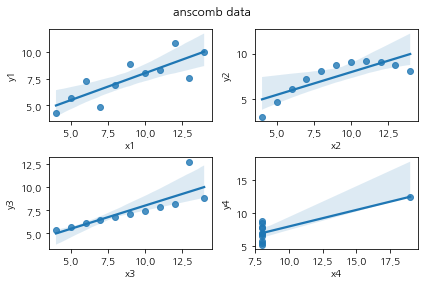

In [45]:
plt.subplot(221)
sns.regplot(x='x1',y='y1',data=df)
plt.subplot(222)
sns.regplot(x='x2',y='y2',data=df)
plt.subplot(223)
sns.regplot(x='x3',y='y3',data=df)
plt.subplot(224)
sns.regplot(x='x4',y='y4',data=df)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.suptitle('anscomb data')
plt.show()

In [47]:
for i in range(1,5):
    print(f'x{i}, y{i}의 상관계수', sp.stats.pearsonr(df[f'x{i}'],df[f'y{i}'])[0])

x1, y1의 상관계수 0.81642051634484
x2, y2의 상관계수 0.8162365060002427
x3, y3의 상관계수 0.8162867394895982
x4, y4의 상관계수 0.8165214368885029
